In [33]:
import webbrowser
from multiprocessing.spawn import get_preparation_data

# INITIAL IMPORTS OF PACKAGES AND NECESSARY FILES
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from fontTools.feaLib.variableScalar import Location

data = pd.read_csv('phivolcs_earthquake_data.csv')
data.head


<bound method NDFrame.head of               Date_Time_PH Latitude Longitude Depth_In_Km  Magnitude  \
0      2016-01-01 00:40:00    17.34    120.30         023        3.0   
1      2016-01-01 05:06:00    14.65    123.12         017        3.3   
2      2016-01-01 13:24:00    09.76    125.46         012        2.4   
3      2016-01-01 15:01:00    17.30    120.27         026        2.9   
4      2016-01-01 20:27:00    08.89    126.28         024        3.0   
...                    ...      ...       ...         ...        ...   
91673  2024-08-31 21:54:00    10.16    126.62         010        3.1   
91674  2024-08-31 22:11:00    13.85    120.54         163        3.0   
91675  2024-08-31 22:36:00    13.68    120.64         090        1.5   
91676  2024-08-31 22:49:00    13.76    120.16         008        1.7   
91677  2024-08-31 22:53:00    02.24    126.60         045        4.1   

                                                Location  
0             015 km N 87° W of San Esteban (I

In [42]:
# DATAFRAME FOR DATASET
# For each block succeeding, run this block first to reset DataFrame before running desired block.
df = pd.DataFrame(data)

In [30]:
# CEBU HEAT MAP

import folium
from folium.plugins import HeatMap

df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].replace('-', np.nan)
df = df.dropna(subset=['Latitude', 'Longitude'])
df.head()

df= df[df['Location'].str.contains("Cebu")]

geodf = df[['Latitude', 'Longitude', 'Magnitude']]

center = [12.8797, 121.7740]
eqmap = folium.Map(location=center, zoom_start=5)

heat_data = [[float(row['Latitude']), float(row['Longitude']), row['Magnitude']] for index, row in geodf.iterrows()]

HeatMap(heat_data).add_to(eqmap)

eqmap.save('heatmap.html')


In [38]:
# HEAT MAP OF MAGNITUDES OVER 6.0

import folium
from folium.plugins import HeatMap

df[['Latitude', 'Longitude']] = df[['Latitude', 'Longitude']].replace('-', np.nan)
df = df.dropna(subset=['Latitude', 'Longitude'])
df.head()

df= df[df['Magnitude'] > 6.0]

geodf = df[['Latitude', 'Longitude', 'Magnitude']]

center = [12.8797, 121.7740]
eqmap = folium.Map(location=center, zoom_start=5)

heat_data = [[float(row['Latitude']), float(row['Longitude']), row['Magnitude']] for index, row in geodf.iterrows()]

HeatMap(heat_data).add_to(eqmap)

eqmap.save('StrongQuakes_HeatMap.html')

In [43]:
# INITIAL DATE COUNTS OVER A 4-MONTH INTERVAL

df['Date_Time_PH'] = pd.to_datetime(df['Date_Time_PH'])

df.set_index('Date_Time_PH', inplace=True)

eqpermonth = df.resample('4ME').size()

eqpermonth

Date_Time_PH
2016-01-31     190
2016-05-31     212
2016-09-30       0
2017-01-31       0
2017-05-31       0
2017-09-30    1206
2018-01-31    1089
2018-05-31    1799
2018-09-30    2157
2019-01-31    2549
2019-05-31    4043
2019-09-30    3091
2020-01-31    6950
2020-05-31    4627
2020-09-30    4693
2021-01-31    3796
2021-05-31    3411
2021-09-30    5013
2022-01-31    3638
2022-05-31    4274
2022-09-30    5873
2023-01-31    4310
2023-05-31    4696
2023-09-30    4400
2024-01-31    8525
2024-05-31    6063
2024-09-30    5073
Freq: 4ME, dtype: int64

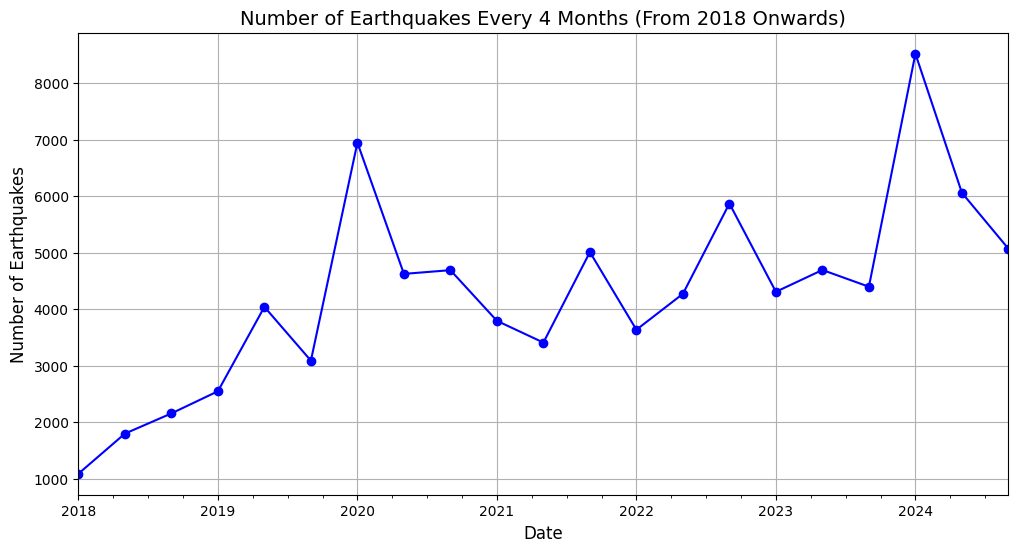

In [44]:
# TIME SERIES OVER A 4-MONTH INTERVAL STARTING FROM 2018
# Requires previous block to be run for 'eqpermonth' DataFrame

eqpermonth_2018 = eqpermonth['2018-01-01':]

plt.figure(figsize=(12, 6))
eqpermonth_2018.plot(kind='line', marker='o', color='b')

plt.title('Number of Earthquakes Every 4 Months (From 2018 Onwards)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)

plt.grid(True)
plt.show()

In [28]:
# EARTHQUAKE FREQUENCY OVER A 4-MONTH INTERVAL

earthquake_frequency = df.resample('4ME').size()

earthquake_frequency_clean = earthquake_frequency['2018-01-01':]
earthquake_frequency_clean

Date_Time_PH
2018-01-31    1089
2018-05-31    1799
2018-09-30    2157
2019-01-31    2549
2019-05-31    4043
2019-09-30    3091
2020-01-31    6950
2020-05-31    4627
2020-09-30    4693
2021-01-31    3796
2021-05-31    3411
2021-09-30    5013
2022-01-31    3638
2022-05-31    4274
2022-09-30    5873
2023-01-31    4310
2023-05-31    4696
2023-09-30    4400
2024-01-31    8525
2024-05-31    6063
2024-09-30    5073
Freq: 4ME, dtype: int64